## Quiz; Backpropagation

In [2]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 23.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:0031m32.6 MB/s eta 0:00:01


In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [18]:
def plot_graph(X,Y,X_hat=None,Y_hat=None,str_title=None):
    fig = plt.figure(figsize=(8,6))
    
    if str_title is not None :
        plt.title(str_title,fontsize=20, pad=20)
        
    plt.plot(X,Y, ls='none', marker='o')
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)
        
    plt.tick_params(axis='both',labelsize=14)

## Implement backpropagtaion

### generate data

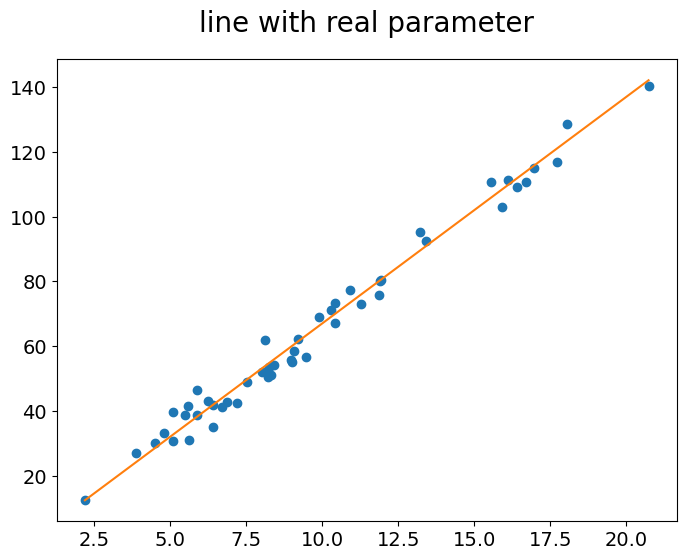

In [19]:
N = 50

x = tf.random.normal([N], 10, 5)
y = 7 * x - 3 + tf.random.normal([N], 0, 4)
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl,7*x_fl-3,str_title="line with real parameter")

### define function -1

In [20]:
def relu(x):
    if x > 0.0 :
        return x
    else :
        return 0.0

# y = relu(wx+b)
def MSE(x, y, w, b):
    totalError = 0
    for i in range(N):
        x_i = x[i]
        y_i = y[i]
        totalError += (y_i - relu(w * x_i + b)) ** 2
    return totalError / float(N)

### define function for backpropagation

![backprop](backpropagation.png)

### TODO

In [21]:
def cal_gradient(x, y, w, b):
    b_gradient = 0
    w_gradient = 0
    
    for i in range(0, N):
        x_i = x[i]
        y_i = y[i]
        
        dL_df1 = 1.0
        dL_df2 = dL_df1 * (1/float(N))
        dL_df3 = dL_df2 * 2.0 * (y_i - relu(w * x_i + b))
        dL_df4 = dL_df3 * 1.0
        dL_df5 = dL_df4 * -1
        if (w * x_i) + b > 0.0 :
            dL_df6 = dL_df5 * 1.0
        else :
            dL_df6 = 0.0
        b_gradient += dL_df6 * 1.0 
        dL_df7 = dL_df6 * x_i
        w_gradient += dL_df7
    return [w_gradient, b_gradient]

### define function -2

In [22]:
def apply_gradient(gradients, parameters, learning_rate):
    [w_g, b_g] = gradients
    [w, b] = parameters
    w = w - learning_rate * w_g
    b = b - learning_rate * b_g
    return [w, b]

def run_opt(x, y, w, b, learning_rate):
    gradients = cal_gradient(x, y, w, b)
    return apply_gradient(gradients, [w, b], learning_rate)

In [23]:
w = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

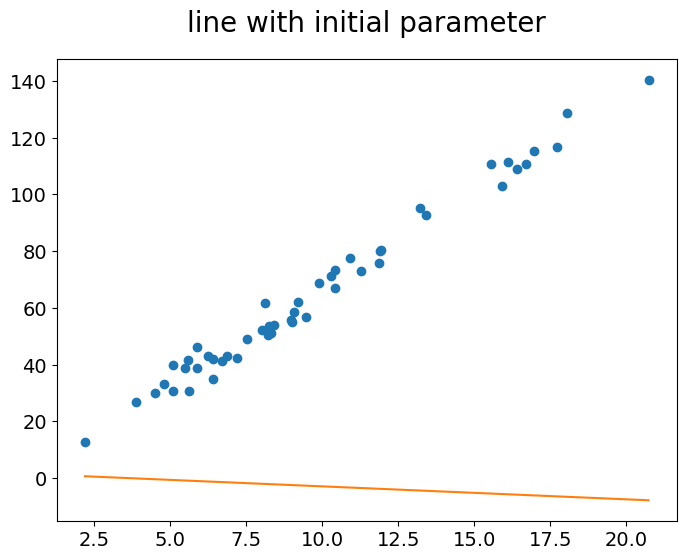

In [24]:
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl, w*x_fl+b, str_title="line with initial parameter")

In [25]:
learning_rate = 0.005
training_steps = 2000
display_step = 200

for step in range(training_steps):
    [w_new, b_new] = run_opt(x, y, w, b, learning_rate)
    w = w_new
    b = b_new
    
    if step % display_step == 0:
        loss = MSE(x, y, w, b)
        print("step: ", step, ", loss: ", loss.numpy(), ", w: ", w.numpy(), ", b: ", b.numpy())

step:  0 , loss:  [5051.5986] , w:  [-0.45177543] , b:  [1.6963974]
step:  200 , loss:  [16.421673] , w:  [6.607305] , b:  [1.1318733]
step:  400 , loss:  [15.509237] , w:  [6.689437] , b:  [0.18389873]
step:  600 , loss:  [15.0292015] , w:  [6.749009] , b:  [-0.5036978]
step:  800 , loss:  [14.776646] , w:  [6.792219] , b:  [-1.0024338]
step:  1000 , loss:  [14.64378] , w:  [6.8235607] , b:  [-1.3641832]
step:  1200 , loss:  [14.573879] , w:  [6.8462934] , b:  [-1.6265718]
step:  1400 , loss:  [14.537093] , w:  [6.8627825] , b:  [-1.8168902]
step:  1600 , loss:  [14.517752] , w:  [6.8747425] , b:  [-1.954935]
step:  1800 , loss:  [14.507573] , w:  [6.8834176] , b:  [-2.055062]


In [27]:
learning_rate = 0.001
training_steps = 2000
display_step = 200

for step in range(training_steps):
    [w_new, b_new] = run_opt(x, y, w, b, learning_rate)
    w = w_new
    b = b_new
    
    if step % display_step == 0:
        loss = MSE(x, y, w, b)
        print("step: ", step, ", loss: ", loss.numpy(), ", w: ", w.numpy(), ", b: ", b.numpy())

step:  0 , loss:  [14.502227] , w:  [6.889688] , b:  [-2.1274405]
step:  200 , loss:  [14.501518] , w:  [6.8907228] , b:  [-2.1393783]
step:  400 , loss:  [14.500882] , w:  [6.891693] , b:  [-2.1505733]
step:  600 , loss:  [14.500326] , w:  [6.892602] , b:  [-2.1610734]
step:  800 , loss:  [14.499835] , w:  [6.8934555] , b:  [-2.1709201]
step:  1000 , loss:  [14.499407] , w:  [6.8942547] , b:  [-2.180155]
step:  1200 , loss:  [14.499028] , w:  [6.895006] , b:  [-2.1888158]
step:  1400 , loss:  [14.498695] , w:  [6.895709] , b:  [-2.1969373]
step:  1600 , loss:  [14.4984045] , w:  [6.89637] , b:  [-2.2045555]
step:  1800 , loss:  [14.498144] , w:  [6.896988] , b:  [-2.2116997]


### check learned parameter

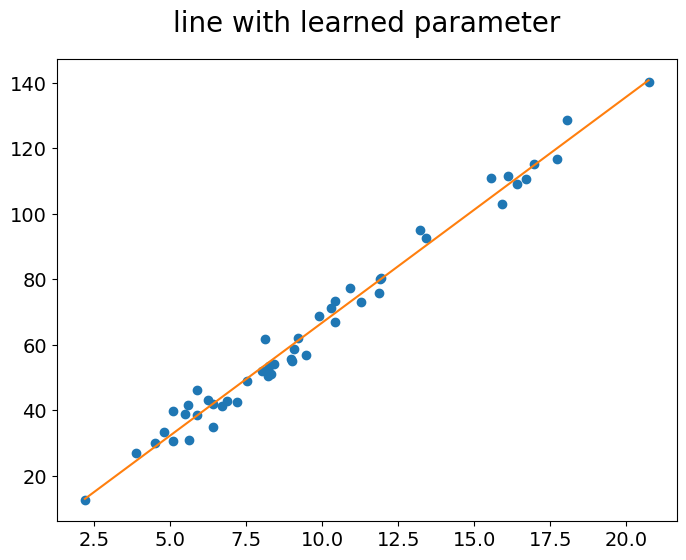

In [26]:
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl, w*x_fl+b, str_title="line with learned parameter")